# Flow analysis with sub-events

## Some observations

### Christian Holm Christensen

## Premise

- Use Generic Framework 
  - Paper [_Phys.Rev._*C89*(2014)064904.](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.89.064904)
  - Reference implementation at [CERN GitLab](https://cern.ch/cholm/mcorrelations)
    - Including integrated and differential flow

## Generic framework - integrated observations

- $Q$-vectors 

  $$Q_{n,p} = \sum_{j} w_j^p e^{in\varphi_j}\quad,$$ 
  
  Index $j$ runs over $\varphi$ observations in event 
  
- $m$-particle correlators

  $$C_{\mathbf{h}}\{m\} = f(\{Q_{n,p}\})\quad,$$ 
  
  in single event
  
- $m$-particle cumulants

  $$c_n\{m\} = g\left(\left\{\overline{C_{\mathbf{h}}}\right\}\right)\quad,$$
  
  over ensemble of events 
  
Generic framework gives expressions for $C_{\mathbf{h}}$, cumulants from expansions. 

## Generic framework - differential observations 

- Three $Q$-vectors 

  \begin{align*}
  \hbox{Particles of interest:} & & p_{n,p} &= \sum_{j\in P} w_j^pe^{in\varphi_j}\\
  \hbox{Reference particles:} & &  r_{n,p} &= \sum_{j\in R} w_j^pe^{in\varphi_j}\\
  \hbox{Overlap particles:} & & q_{n,p} &= \sum_{j\in Q=P\cap R} w_j^pe^{in\varphi_j}\\
  \end{align*}

  Indexes $j$ run over particles in sets $P$, $R$, and $Q=P \cap R$ of event

In [1]:
import matplotlib.pyplot as plt
import matplotlib_venn as mv 
plt.figure(figsize=(6,6))
def prqvenn():
    v = mv.venn2(subsets=(4,2,2),
                 ax=plt.gca(),
                 set_labels=[r'$R$',r'$P$'])
    for id in ['10','01']:
        v.get_patch_by_id(id).set_alpha(.2)
        v.get_label_by_id(id).set_text('')
    v.get_label_by_id('11').set_text(r'$Q$')
    plt.show()

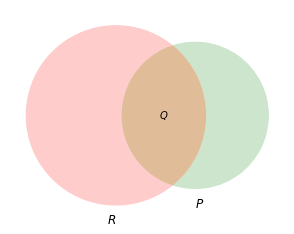

In [2]:
prqvenn()

## Generic framework - differential observations - cont.

- $m$-particle differential correlators 

  $$C'_{\mathbf{h}}\{m\} = f'(\{p_{n,p},r_{n,p},q_{n,p}\})\quad,$$
  
  in each event 
  
- $m$-particle cumulants 

  $$d_{n}\{m\} = g'\left(\left\{\overline{C'_{\mathbf{h}}}\{m\}\right\}\right)\quad,$$
  
  over ensemble of events. 
  
Generic framework gives $C'_{\mathbf{h}}\{m\}$, expansion gives cumulants. 

## Flow from Generic Framework

### integrated 

General expression from $m$-particle correlation 

$$ v_{n}\{2k\} = \sqrt[\textstyle{2k}]{(-1)^{k-1}\frac{1}{M_k}c_{n}\{2k\}}\quad,$$ 

with $m=2k$ and 

$$M = \{1, 1, 4, 33, 456, 9460, 274800, 10643745, \ldots\}\quad.$$

### Differential 

We have 

$$v'_n\{2k\} = \frac{(-1)^{k-1}}{M^{1/(2k)}} \frac{d_n\{2k\}}{\left[(-1)^{k-1}c_{n}\{2k\}\right]^{1-1/(2k)}} = \frac{d_n\{2k\}}{c_{n}\{2k\}}v_n\{2k\} \quad,$$

i.e., factor $d_n\{m\}/c_n\{m\}$ times integrated flow $v_n\{m\}$. 

So we have 

$$ v_n\{m\} = 0 \quad\Rightarrow\quad v'_n\{m\} = 0\quad.$$

## Correlators

In [3]:
from sympy import *
init_printing()

In [4]:
h1,h2,h3,h4,h5,h6 = symbols("h1,h2,h3,h4,h5,h6",integer=True)
Q = symbols("Q",cls=Function)
C2 = Q(h1,1) * Q(h2,1) - Q(h1 + h2,2)
C3 = Q(h1,1) * Q(h2,1) * Q(h3,1) - Q(h1 + h2,2) * Q(h3,1) - Q(h1 + h3,2) * Q(h2,1) - Q(h1,1) * Q(h2 + h3,2) + 2 * Q(h1 + h2 + h3,3)
C4 = Q(h1,1) * Q(h2,1) * Q(h3,1) * Q(h4,1) - Q(h1 + h2,2) * Q(h3,1) * Q(h4,1) - Q(h2,1) * Q(h1 + h3,2) * Q(h4,1) - Q(h1,1) * Q(h2 + h3,2) * Q(h4,1) + 2 * Q(h1 + h2 + h3,3) * Q(h4,1) - Q(h2,1) * Q(h3,1) * Q(h1 + h4,2) + Q(h2 + h3,2) * Q(h1 + h4,2) - Q(h1,1) * Q(h3,1) * Q(h2 + h4,2) + Q(h1 + h3,2) * Q(h2 + h4,2) + 2 * Q(h3,1) * Q(h1 + h2 + h4,3) - Q(h1,1) * Q(h2,1) * Q(h3 + h4,2) + Q(h1 + h2,2) * Q(h3 + h4,2) + 2 * Q(h2,1) * Q(h1 + h3 + h4,3) + 2 * Q(h1,1) * Q(h2 + h3 + h4,3) - 6 * Q(h1 + h2 + h3 + h4,4)
C5 = Q(h1,1) * Q(h2,1) * Q(h3,1) * Q(h4,1) * Q(h5,1) - Q(h1 + h2,2) * Q(h3,1) * Q(h4,1) * Q(h5,1) - Q(h2,1) * Q(h1 + h3,2) * Q(h4,1) * Q(h5,1) - Q(h1,1) * Q(h2 + h3,2) * Q(h4,1) * Q(h5,1) + 2 * Q(h1 + h2 + h3,3) * Q(h4,1) * Q(h5,1) - Q(h2,1) * Q(h3,1) * Q(h1 + h4,2) * Q(h5,1) + Q(h2 + h3,2) * Q(h1 + h4,2) * Q(h5,1) - Q(h1,1) * Q(h3,1) * Q(h2 + h4,2) * Q(h5,1) + Q(h1 + h3,2) * Q(h2 + h4,2) * Q(h5,1) + 2 * Q(h3,1) * Q(h1 + h2 + h4,3) * Q(h5,1) - Q(h1,1) * Q(h2,1) * Q(h3 + h4,2) * Q(h5,1) + Q(h1 + h2,2) * Q(h3 + h4,2) * Q(h5,1) + 2 * Q(h2,1) * Q(h1 + h3 + h4,3) * Q(h5,1) + 2 * Q(h1,1) * Q(h2 + h3 + h4,3) * Q(h5,1) - 6 * Q(h1 + h2 + h3 + h4,4) * Q(h5,1) - Q(h2,1) * Q(h3,1) * Q(h4,1) * Q(h1 + h5,2) + Q(h2 + h3,2) * Q(h4,1) * Q(h1 + h5,2) + Q(h3,1) * Q(h2 + h4,2) * Q(h1 + h5,2) + Q(h2,1) * Q(h3 + h4,2) * Q(h1 + h5,2) - 2 * Q(h2 + h3 + h4,3) * Q(h1 + h5,2) - Q(h1,1) * Q(h3,1) * Q(h4,1) * Q(h2 + h5,2) + Q(h1 + h3,2) * Q(h4,1) * Q(h2 + h5,2) + Q(h3,1) * Q(h1 + h4,2) * Q(h2 + h5,2) + Q(h1,1) * Q(h3 + h4,2) * Q(h2 + h5,2) - 2 * Q(h1 + h3 + h4,3) * Q(h2 + h5,2) + 2 * Q(h3,1) * Q(h4,1) * Q(h1 + h2 + h5,3) - 2 * Q(h3 + h4,2) * Q(h1 + h2 + h5,3) - Q(h1,1) * Q(h2,1) * Q(h4,1) * Q(h3 + h5,2) + Q(h1 + h2,2) * Q(h4,1) * Q(h3 + h5,2) + Q(h2,1) * Q(h1 + h4,2) * Q(h3 + h5,2) + Q(h1,1) * Q(h2 + h4,2) * Q(h3 + h5,2) - 2 * Q(h1 + h2 + h4,3) * Q(h3 + h5,2) + 2 * Q(h2,1) * Q(h4,1) * Q(h1 + h3 + h5,3) - 2 * Q(h2 + h4,2) * Q(h1 + h3 + h5,3) + 2 * Q(h1,1) * Q(h4,1) * Q(h2 + h3 + h5,3) - 2 * Q(h1 + h4,2) * Q(h2 + h3 + h5,3) - 6 * Q(h4,1) * Q(h1 + h2 + h3 + h5,4) - Q(h1,1) * Q(h2,1) * Q(h3,1) * Q(h4 + h5,2) + Q(h1 + h2,2) * Q(h3,1) * Q(h4 + h5,2) + Q(h2,1) * Q(h1 + h3,2) * Q(h4 + h5,2) + Q(h1,1) * Q(h2 + h3,2) * Q(h4 + h5,2) - 2 * Q(h1 + h2 + h3,3) * Q(h4 + h5,2) + 2 * Q(h2,1) * Q(h3,1) * Q(h1 + h4 + h5,3) - 2 * Q(h2 + h3,2) * Q(h1 + h4 + h5,3) + 2 * Q(h1,1) * Q(h3,1) * Q(h2 + h4 + h5,3) - 2 * Q(h1 + h3,2) * Q(h2 + h4 + h5,3) - 6 * Q(h3,1) * Q(h1 + h2 + h4 + h5,4) + 2 * Q(h1,1) * Q(h2,1) * Q(h3 + h4 + h5,3) - 2 * Q(h1 + h2,2) * Q(h3 + h4 + h5,3) - 6 * Q(h2,1) * Q(h1 + h3 + h4 + h5,4) - 6 * Q(h1,1) * Q(h2 + h3 + h4 + h5,4) + 24 * Q(h1 + h2 + h3 + h4 + h5,5)
C6 = -6*(Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3 + h4 + h5 + h6, 4) - 6*(Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h2 + h4 + h5 + h6, 4) - 6*(Q(h1, 1)*Q(h4, 1) - Q(h1 + h4, 2))*Q(h2 + h3 + h5 + h6, 4) - 6*(Q(h1, 1)*Q(h5, 1) - Q(h1 + h5, 2))*Q(h2 + h3 + h4 + h6, 4) - 6*(Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h1 + h4 + h5 + h6, 4) - 6*(Q(h2, 1)*Q(h4, 1) - Q(h2 + h4, 2))*Q(h1 + h3 + h5 + h6, 4) - 6*(Q(h2, 1)*Q(h5, 1) - Q(h2 + h5, 2))*Q(h1 + h3 + h4 + h6, 4) - 6*(Q(h3, 1)*Q(h4, 1) - Q(h3 + h4, 2))*Q(h1 + h2 + h5 + h6, 4) - 6*(Q(h3, 1)*Q(h5, 1) - Q(h3 + h5, 2))*Q(h1 + h2 + h4 + h6, 4) - 6*(Q(h4, 1)*Q(h5, 1) - Q(h4 + h5, 2))*Q(h1 + h2 + h3 + h6, 4) + 2*((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3, 1) - Q(h1, 1)*Q(h2 + h3, 2) - Q(h2, 1)*Q(h1 + h3, 2) + 2*Q(h1 + h2 + h3, 3))*Q(h4 + h5 + h6, 3) + 2*((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h4, 1) - Q(h1, 1)*Q(h2 + h4, 2) - Q(h2, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h2 + h4, 3))*Q(h3 + h5 + h6, 3) + 2*((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h5, 1) - Q(h1, 1)*Q(h2 + h5, 2) - Q(h2, 1)*Q(h1 + h5, 2) + 2*Q(h1 + h2 + h5, 3))*Q(h3 + h4 + h6, 3) + 2*((Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h4, 1) - Q(h1, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h3 + h4, 3))*Q(h2 + h5 + h6, 3) + 2*((Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h5, 1) - Q(h1, 1)*Q(h3 + h5, 2) - Q(h3, 1)*Q(h1 + h5, 2) + 2*Q(h1 + h3 + h5, 3))*Q(h2 + h4 + h6, 3) + 2*((Q(h1, 1)*Q(h4, 1) - Q(h1 + h4, 2))*Q(h5, 1) - Q(h1, 1)*Q(h4 + h5, 2) - Q(h4, 1)*Q(h1 + h5, 2) + 2*Q(h1 + h4 + h5, 3))*Q(h2 + h3 + h6, 3) + 2*((Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h4, 1) - Q(h2, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h2 + h4, 2) + 2*Q(h2 + h3 + h4, 3))*Q(h1 + h5 + h6, 3) + 2*((Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h5, 1) - Q(h2, 1)*Q(h3 + h5, 2) - Q(h3, 1)*Q(h2 + h5, 2) + 2*Q(h2 + h3 + h5, 3))*Q(h1 + h4 + h6, 3) + 2*((Q(h2, 1)*Q(h4, 1) - Q(h2 + h4, 2))*Q(h5, 1) - Q(h2, 1)*Q(h4 + h5, 2) - Q(h4, 1)*Q(h2 + h5, 2) + 2*Q(h2 + h4 + h5, 3))*Q(h1 + h3 + h6, 3) + 2*((Q(h3, 1)*Q(h4, 1) - Q(h3 + h4, 2))*Q(h5, 1) - Q(h3, 1)*Q(h4 + h5, 2) - Q(h4, 1)*Q(h3 + h5, 2) + 2*Q(h3 + h4 + h5, 3))*Q(h1 + h2 + h6, 3) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3 + h4, 2) + (Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h2 + h4, 2) + (Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h1 + h4, 2) - ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3, 1) - Q(h1, 1)*Q(h2 + h3, 2) - Q(h2, 1)*Q(h1 + h3, 2) + 2*Q(h1 + h2 + h3, 3))*Q(h4, 1) - 2*Q(h1, 1)*Q(h2 + h3 + h4, 3) - 2*Q(h2, 1)*Q(h1 + h3 + h4, 3) - 2*Q(h3, 1)*Q(h1 + h2 + h4, 3) + 6*Q(h1 + h2 + h3 + h4, 4))*Q(h5 + h6, 2) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3 + h5, 2) + (Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h2 + h5, 2) + (Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h1 + h5, 2) - ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3, 1) - Q(h1, 1)*Q(h2 + h3, 2) - Q(h2, 1)*Q(h1 + h3, 2) + 2*Q(h1 + h2 + h3, 3))*Q(h5, 1) - 2*Q(h1, 1)*Q(h2 + h3 + h5, 3) - 2*Q(h2, 1)*Q(h1 + h3 + h5, 3) - 2*Q(h3, 1)*Q(h1 + h2 + h5, 3) + 6*Q(h1 + h2 + h3 + h5, 4))*Q(h4 + h6, 2) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h4 + h5, 2) + (Q(h1, 1)*Q(h4, 1) - Q(h1 + h4, 2))*Q(h2 + h5, 2) + (Q(h2, 1)*Q(h4, 1) - Q(h2 + h4, 2))*Q(h1 + h5, 2) - ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h4, 1) - Q(h1, 1)*Q(h2 + h4, 2) - Q(h2, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h2 + h4, 3))*Q(h5, 1) - 2*Q(h1, 1)*Q(h2 + h4 + h5, 3) - 2*Q(h2, 1)*Q(h1 + h4 + h5, 3) - 2*Q(h4, 1)*Q(h1 + h2 + h5, 3) + 6*Q(h1 + h2 + h4 + h5, 4))*Q(h3 + h6, 2) + ((Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h4 + h5, 2) + (Q(h1, 1)*Q(h4, 1) - Q(h1 + h4, 2))*Q(h3 + h5, 2) + (Q(h3, 1)*Q(h4, 1) - Q(h3 + h4, 2))*Q(h1 + h5, 2) - ((Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h4, 1) - Q(h1, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h3 + h4, 3))*Q(h5, 1) - 2*Q(h1, 1)*Q(h3 + h4 + h5, 3) - 2*Q(h3, 1)*Q(h1 + h4 + h5, 3) - 2*Q(h4, 1)*Q(h1 + h3 + h5, 3) + 6*Q(h1 + h3 + h4 + h5, 4))*Q(h2 + h6, 2) + ((Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h4 + h5, 2) + (Q(h2, 1)*Q(h4, 1) - Q(h2 + h4, 2))*Q(h3 + h5, 2) + (Q(h3, 1)*Q(h4, 1) - Q(h3 + h4, 2))*Q(h2 + h5, 2) - ((Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h4, 1) - Q(h2, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h2 + h4, 2) + 2*Q(h2 + h3 + h4, 3))*Q(h5, 1) - 2*Q(h2, 1)*Q(h3 + h4 + h5, 3) - 2*Q(h3, 1)*Q(h2 + h4 + h5, 3) - 2*Q(h4, 1)*Q(h2 + h3 + h5, 3) + 6*Q(h2 + h3 + h4 + h5, 4))*Q(h1 + h6, 2) - (-2*(Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3 + h4 + h5, 3) - 2*(Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h2 + h4 + h5, 3) - 2*(Q(h1, 1)*Q(h4, 1) - Q(h1 + h4, 2))*Q(h2 + h3 + h5, 3) - 2*(Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h1 + h4 + h5, 3) - 2*(Q(h2, 1)*Q(h4, 1) - Q(h2 + h4, 2))*Q(h1 + h3 + h5, 3) - 2*(Q(h3, 1)*Q(h4, 1) - Q(h3 + h4, 2))*Q(h1 + h2 + h5, 3) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3, 1) - Q(h1, 1)*Q(h2 + h3, 2) - Q(h2, 1)*Q(h1 + h3, 2) + 2*Q(h1 + h2 + h3, 3))*Q(h4 + h5, 2) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h4, 1) - Q(h1, 1)*Q(h2 + h4, 2) - Q(h2, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h2 + h4, 3))*Q(h3 + h5, 2) + ((Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h4, 1) - Q(h1, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h1 + h4, 2) + 2*Q(h1 + h3 + h4, 3))*Q(h2 + h5, 2) + ((Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h4, 1) - Q(h2, 1)*Q(h3 + h4, 2) - Q(h3, 1)*Q(h2 + h4, 2) + 2*Q(h2 + h3 + h4, 3))*Q(h1 + h5, 2) + ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3 + h4, 2) + (Q(h1, 1)*Q(h3, 1) - Q(h1 + h3, 2))*Q(h2 + h4, 2) + (Q(h2, 1)*Q(h3, 1) - Q(h2 + h3, 2))*Q(h1 + h4, 2) - ((Q(h1, 1)*Q(h2, 1) - Q(h1 + h2, 2))*Q(h3, 1) - Q(h1, 1)*Q(h2 + h3, 2) - Q(h2, 1)*Q(h1 + h3, 2) + 2*Q(h1 + h2 + h3, 3))*Q(h4, 1) - 2*Q(h1, 1)*Q(h2 + h3 + h4, 3) - 2*Q(h2, 1)*Q(h1 + h3 + h4, 3) - 2*Q(h3, 1)*Q(h1 + h2 + h4, 3) + 6*Q(h1 + h2 + h3 + h4, 4))*Q(h5, 1) + 6*Q(h1, 1)*Q(h2 + h3 + h4 + h5, 4) + 6*Q(h2, 1)*Q(h1 + h3 + h4 + h5, 4) + 6*Q(h3, 1)*Q(h1 + h2 + h4 + h5, 4) + 6*Q(h4, 1)*Q(h1 + h2 + h3 + h5, 4) - 24*Q(h1 + h2 + h3 + h4 + h5, 5))*Q(h6, 1) + 24*Q(h1, 1)*Q(h2 + h3 + h4 + h5 + h6, 5) + 24*Q(h2, 1)*Q(h1 + h3 + h4 + h5 + h6, 5) + 24*Q(h3, 1)*Q(h1 + h2 + h4 + h5 + h6, 5) + 24*Q(h4, 1)*Q(h1 + h2 + h3 + h5 + h6, 5) + 24*Q(h5, 1)*Q(h1 + h2 + h3 + h4 + h6, 5) - 120*Q(h1 + h2 + h3 + h4 + h5 + h6, 6)
r = symbols("r",cls=Function)
p = symbols("p",cls=Function)
q = symbols("q",cls=Function)
Cp2 = p(h1,1) * r(h2,1) - q(h1 + h2,2)
Cp3 = p(h1,1) * r(h2,1) * r(h3,1) - q(h1 + h2,2) * r(h3,1) - q(h1 + h3,2) * r(h2,1) - p(h1,1) * r(h2 + h3,2) + 2 * q(h1 + h2 + h3,3)
Cp4 = p(h1,1) * r(h2,1) * r(h3,1) * r(h4,1) - q(h1 + h2,2) * r(h3,1) * r(h4,1) - r(h2,1) * q(h1 + h3,2) * r(h4,1) - p(h1,1) * r(h2 + h3,2) * r(h4,1) + 2 * q(h1 + h2 + h3,3) * r(h4,1) - r(h2,1) * r(h3,1) * q(h1 + h4,2) + r(h2 + h3,2) * q(h1 + h4,2) - p(h1,1) * r(h3,1) * r(h2 + h4,2) + q(h1 + h3,2) * r(h2 + h4,2) + 2 * r(h3,1) * q(h1 + h2 + h4,3) - p(h1,1) * r(h2,1) * r(h3 + h4,2) + q(h1 + h2,2) * r(h3 + h4,2) + 2 * r(h2,1) * q(h1 + h3 + h4,3) + 2 * p(h1,1) * r(h2 + h3 + h4,3) - 6 * q(h1 + h2 + h3 + h4,4)
Cp5 = p(h1,1) * r(h2,1) * r(h3,1) * r(h4,1) * r(h5,1) - q(h1 + h2,2) * r(h3,1) * r(h4,1) * r(h5,1) - r(h2,1) * q(h1 + h3,2) * r(h4,1) * r(h5,1) - p(h1,1) * r(h2 + h3,2) * r(h4,1) * r(h5,1) + 2 * q(h1 + h2 + h3,3) * r(h4,1) * r(h5,1) - r(h2,1) * r(h3,1) * q(h1 + h4,2) * r(h5,1) + r(h2 + h3,2) * q(h1 + h4,2) * r(h5,1) - p(h1,1) * r(h3,1) * r(h2 + h4,2) * r(h5,1) + q(h1 + h3,2) * r(h2 + h4,2) * r(h5,1) + 2 * r(h3,1) * q(h1 + h2 + h4,3) * r(h5,1) - p(h1,1) * r(h2,1) * r(h3 + h4,2) * r(h5,1) + q(h1 + h2,2) * r(h3 + h4,2) * r(h5,1) + 2 * r(h2,1) * q(h1 + h3 + h4,3) * r(h5,1) + 2 * p(h1,1) * r(h2 + h3 + h4,3) * r(h5,1) - 6 * q(h1 + h2 + h3 + h4,4) * r(h5,1) - r(h2,1) * r(h3,1) * r(h4,1) * q(h1 + h5,2) + r(h2 + h3,2) * r(h4,1) * q(h1 + h5,2) + r(h3,1) * r(h2 + h4,2) * q(h1 + h5,2) + r(h2,1) * r(h3 + h4,2) * q(h1 + h5,2) - 2 * r(h2 + h3 + h4,3) * q(h1 + h5,2) - p(h1,1) * r(h3,1) * r(h4,1) * r(h2 + h5,2) + q(h1 + h3,2) * r(h4,1) * r(h2 + h5,2) + r(h3,1) * q(h1 + h4,2) * r(h2 + h5,2) + p(h1,1) * r(h3 + h4,2) * r(h2 + h5,2) - 2 * q(h1 + h3 + h4,3) * r(h2 + h5,2) + 2 * r(h3,1) * r(h4,1) * q(h1 + h2 + h5,3) - 2 * r(h3 + h4,2) * q(h1 + h2 + h5,3) - p(h1,1) * r(h2,1) * r(h4,1) * r(h3 + h5,2) + q(h1 + h2,2) * r(h4,1) * r(h3 + h5,2) + r(h2,1) * q(h1 + h4,2) * r(h3 + h5,2) + p(h1,1) * r(h2 + h4,2) * r(h3 + h5,2) - 2 * q(h1 + h2 + h4,3) * r(h3 + h5,2) + 2 * r(h2,1) * r(h4,1) * q(h1 + h3 + h5,3) - 2 * r(h2 + h4,2) * q(h1 + h3 + h5,3) + 2 * p(h1,1) * r(h4,1) * r(h2 + h3 + h5,3) - 2 * q(h1 + h4,2) * r(h2 + h3 + h5,3) - 6 * r(h4,1) * q(h1 + h2 + h3 + h5,4) - p(h1,1) * r(h2,1) * r(h3,1) * r(h4 + h5,2) + q(h1 + h2,2) * r(h3,1) * r(h4 + h5,2) + r(h2,1) * q(h1 + h3,2) * r(h4 + h5,2) + p(h1,1) * r(h2 + h3,2) * r(h4 + h5,2) - 2 * q(h1 + h2 + h3,3) * r(h4 + h5,2) + 2 * r(h2,1) * r(h3,1) * q(h1 + h4 + h5,3) - 2 * r(h2 + h3,2) * q(h1 + h4 + h5,3) + 2 * p(h1,1) * r(h3,1) * r(h2 + h4 + h5,3) - 2 * q(h1 + h3,2) * r(h2 + h4 + h5,3) - 6 * r(h3,1) * q(h1 + h2 + h4 + h5,4) + 2 * p(h1,1) * r(h2,1) * r(h3 + h4 + h5,3) - 2 * q(h1 + h2,2) * r(h3 + h4 + h5,3) - 6 * r(h2,1) * q(h1 + h3 + h4 + h5,4) - 6 * p(h1,1) * r(h2 + h3 + h4 + h5,4) + 24 * q(h1 + h2 + h3 + h4 + h5,5)
Cp6 = -6*(p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3 + h4 + h5 + h6, 4) - 6*(p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h2 + h4 + h5 + h6, 4) - 6*(p(h1, 1)*r(h4, 1) - q(h1 + h4, 2))*r(h2 + h3 + h5 + h6, 4) - 6*(p(h1, 1)*r(h5, 1) - q(h1 + h5, 2))*r(h2 + h3 + h4 + h6, 4) - 6*(r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*q(h1 + h4 + h5 + h6, 4) - 6*(r(h2, 1)*r(h4, 1) - r(h2 + h4, 2))*q(h1 + h3 + h5 + h6, 4) - 6*(r(h2, 1)*r(h5, 1) - r(h2 + h5, 2))*q(h1 + h3 + h4 + h6, 4) - 6*(r(h3, 1)*r(h4, 1) - r(h3 + h4, 2))*q(h1 + h2 + h5 + h6, 4) - 6*(r(h3, 1)*r(h5, 1) - r(h3 + h5, 2))*q(h1 + h2 + h4 + h6, 4) - 6*(r(h4, 1)*r(h5, 1) - r(h4 + h5, 2))*q(h1 + h2 + h3 + h6, 4) + 2*((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3, 1) - p(h1, 1)*r(h2 + h3, 2) - q(h1 + h3, 2)*r(h2, 1) + 2*q(h1 + h2 + h3, 3))*r(h4 + h5 + h6, 3) + 2*((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h4, 1) - p(h1, 1)*r(h2 + h4, 2) - q(h1 + h4, 2)*r(h2, 1) + 2*q(h1 + h2 + h4, 3))*r(h3 + h5 + h6, 3) + 2*((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h5, 1) - p(h1, 1)*r(h2 + h5, 2) - q(h1 + h5, 2)*r(h2, 1) + 2*q(h1 + h2 + h5, 3))*r(h3 + h4 + h6, 3) + 2*((p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h4, 1) - p(h1, 1)*r(h3 + h4, 2) - q(h1 + h4, 2)*r(h3, 1) + 2*q(h1 + h3 + h4, 3))*r(h2 + h5 + h6, 3) + 2*((p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h5, 1) - p(h1, 1)*r(h3 + h5, 2) - q(h1 + h5, 2)*r(h3, 1) + 2*q(h1 + h3 + h5, 3))*r(h2 + h4 + h6, 3) + 2*((p(h1, 1)*r(h4, 1) - q(h1 + h4, 2))*r(h5, 1) - p(h1, 1)*r(h4 + h5, 2) - q(h1 + h5, 2)*r(h4, 1) + 2*q(h1 + h4 + h5, 3))*r(h2 + h3 + h6, 3) + 2*((r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*r(h4, 1) - r(h2, 1)*r(h3 + h4, 2) - r(h3, 1)*r(h2 + h4, 2) + 2*r(h2 + h3 + h4, 3))*q(h1 + h5 + h6, 3) + 2*((r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*r(h5, 1) - r(h2, 1)*r(h3 + h5, 2) - r(h3, 1)*r(h2 + h5, 2) + 2*r(h2 + h3 + h5, 3))*q(h1 + h4 + h6, 3) + 2*((r(h2, 1)*r(h4, 1) - r(h2 + h4, 2))*r(h5, 1) - r(h2, 1)*r(h4 + h5, 2) - r(h4, 1)*r(h2 + h5, 2) + 2*r(h2 + h4 + h5, 3))*q(h1 + h3 + h6, 3) + 2*((r(h3, 1)*r(h4, 1) - r(h3 + h4, 2))*r(h5, 1) - r(h3, 1)*r(h4 + h5, 2) - r(h4, 1)*r(h3 + h5, 2) + 2*r(h3 + h4 + h5, 3))*q(h1 + h2 + h6, 3) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3 + h4, 2) + (p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h2 + h4, 2) + (r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*q(h1 + h4, 2) - ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3, 1) - p(h1, 1)*r(h2 + h3, 2) - q(h1 + h3, 2)*r(h2, 1) + 2*q(h1 + h2 + h3, 3))*r(h4, 1) - 2*p(h1, 1)*r(h2 + h3 + h4, 3) - 2*q(h1 + h2 + h4, 3)*r(h3, 1) - 2*q(h1 + h3 + h4, 3)*r(h2, 1) + 6*q(h1 + h2 + h3 + h4, 4))*r(h5 + h6, 2) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3 + h5, 2) + (p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h2 + h5, 2) + (r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*q(h1 + h5, 2) - ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3, 1) - p(h1, 1)*r(h2 + h3, 2) - q(h1 + h3, 2)*r(h2, 1) + 2*q(h1 + h2 + h3, 3))*r(h5, 1) - 2*p(h1, 1)*r(h2 + h3 + h5, 3) - 2*q(h1 + h2 + h5, 3)*r(h3, 1) - 2*q(h1 + h3 + h5, 3)*r(h2, 1) + 6*q(h1 + h2 + h3 + h5, 4))*r(h4 + h6, 2) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h4 + h5, 2) + (p(h1, 1)*r(h4, 1) - q(h1 + h4, 2))*r(h2 + h5, 2) + (r(h2, 1)*r(h4, 1) - r(h2 + h4, 2))*q(h1 + h5, 2) - ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h4, 1) - p(h1, 1)*r(h2 + h4, 2) - q(h1 + h4, 2)*r(h2, 1) + 2*q(h1 + h2 + h4, 3))*r(h5, 1) - 2*p(h1, 1)*r(h2 + h4 + h5, 3) - 2*q(h1 + h2 + h5, 3)*r(h4, 1) - 2*q(h1 + h4 + h5, 3)*r(h2, 1) + 6*q(h1 + h2 + h4 + h5, 4))*r(h3 + h6, 2) + ((p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h4 + h5, 2) + (p(h1, 1)*r(h4, 1) - q(h1 + h4, 2))*r(h3 + h5, 2) + (r(h3, 1)*r(h4, 1) - r(h3 + h4, 2))*q(h1 + h5, 2) - ((p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h4, 1) - p(h1, 1)*r(h3 + h4, 2) - q(h1 + h4, 2)*r(h3, 1) + 2*q(h1 + h3 + h4, 3))*r(h5, 1) - 2*p(h1, 1)*r(h3 + h4 + h5, 3) - 2*q(h1 + h3 + h5, 3)*r(h4, 1) - 2*q(h1 + h4 + h5, 3)*r(h3, 1) + 6*q(h1 + h3 + h4 + h5, 4))*r(h2 + h6, 2) + ((r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*r(h4 + h5, 2) + (r(h2, 1)*r(h4, 1) - r(h2 + h4, 2))*r(h3 + h5, 2) + (r(h3, 1)*r(h4, 1) - r(h3 + h4, 2))*r(h2 + h5, 2) - ((r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*r(h4, 1) - r(h2, 1)*r(h3 + h4, 2) - r(h3, 1)*r(h2 + h4, 2) + 2*r(h2 + h3 + h4, 3))*r(h5, 1) - 2*r(h2, 1)*r(h3 + h4 + h5, 3) - 2*r(h3, 1)*r(h2 + h4 + h5, 3) - 2*r(h4, 1)*r(h2 + h3 + h5, 3) + 6*r(h2 + h3 + h4 + h5, 4))*q(h1 + h6, 2) - (-2*(p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3 + h4 + h5, 3) - 2*(p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h2 + h4 + h5, 3) - 2*(p(h1, 1)*r(h4, 1) - q(h1 + h4, 2))*r(h2 + h3 + h5, 3) - 2*(r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*q(h1 + h4 + h5, 3) - 2*(r(h2, 1)*r(h4, 1) - r(h2 + h4, 2))*q(h1 + h3 + h5, 3) - 2*(r(h3, 1)*r(h4, 1) - r(h3 + h4, 2))*q(h1 + h2 + h5, 3) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3, 1) - p(h1, 1)*r(h2 + h3, 2) - q(h1 + h3, 2)*r(h2, 1) + 2*q(h1 + h2 + h3, 3))*r(h4 + h5, 2) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h4, 1) - p(h1, 1)*r(h2 + h4, 2) - q(h1 + h4, 2)*r(h2, 1) + 2*q(h1 + h2 + h4, 3))*r(h3 + h5, 2) + ((p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h4, 1) - p(h1, 1)*r(h3 + h4, 2) - q(h1 + h4, 2)*r(h3, 1) + 2*q(h1 + h3 + h4, 3))*r(h2 + h5, 2) + ((r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*r(h4, 1) - r(h2, 1)*r(h3 + h4, 2) - r(h3, 1)*r(h2 + h4, 2) + 2*r(h2 + h3 + h4, 3))*q(h1 + h5, 2) + ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3 + h4, 2) + (p(h1, 1)*r(h3, 1) - q(h1 + h3, 2))*r(h2 + h4, 2) + (r(h2, 1)*r(h3, 1) - r(h2 + h3, 2))*q(h1 + h4, 2) - ((p(h1, 1)*r(h2, 1) - q(h1 + h2, 2))*r(h3, 1) - p(h1, 1)*r(h2 + h3, 2) - q(h1 + h3, 2)*r(h2, 1) + 2*q(h1 + h2 + h3, 3))*r(h4, 1) - 2*p(h1, 1)*r(h2 + h3 + h4, 3) - 2*q(h1 + h2 + h4, 3)*r(h3, 1) - 2*q(h1 + h3 + h4, 3)*r(h2, 1) + 6*q(h1 + h2 + h3 + h4, 4))*r(h5, 1) + 6*p(h1, 1)*r(h2 + h3 + h4 + h5, 4) + 6*q(h1 + h2 + h3 + h5, 4)*r(h4, 1) + 6*q(h1 + h2 + h4 + h5, 4)*r(h3, 1) + 6*q(h1 + h3 + h4 + h5, 4)*r(h2, 1) - 24*q(h1 + h2 + h3 + h4 + h5, 5))*r(h6, 1) + 24*p(h1, 1)*r(h2 + h3 + h4 + h5 + h6, 5) + 24*q(h1 + h2 + h3 + h4 + h6, 5)*r(h5, 1) + 24*q(h1 + h2 + h3 + h5 + h6, 5)*r(h4, 1) + 24*q(h1 + h2 + h4 + h5 + h6, 5)*r(h3, 1) + 24*q(h1 + h3 + h4 + h5 + h6, 5)*r(h2, 1) - 120*q(h1 + h2 + h3 + h4 + h5 + h6, 6)


### Integrated

2-particle correlator $C_{h_1,h_2}\{2\}$

In [5]:
C2

3-particle correlator $C_{h_1,h_2,h_3}\{3\}$

In [6]:
C3

4-particle correlator $C_{h_1,h_2,h_3,h_4}\{4\}$

In [7]:
C4

### Differential

2-particle correlator $C'_{h_1,h_2}\{2\}$

In [8]:
Cp2

3-particle correlator $C'_{h_1,h_2,h_3}\{3\}$

In [9]:
Cp3

4-particle correlator $C'_{h_1,h_2,h_3,h_4}\{4\}$

In [10]:
Cp4

## Two sub-events - 2-particle

$$P \cap R = \emptyset\quad\Rightarrow q(\cdot,\cdot)\quad = 0$$

Thus $C_{h_1,h_2}\{2\}$ becomes 

In [11]:
Cp2.replace(q, lambda *x:0)

## Two sub-events - 4-particle 

Partition $\mathbf{h}$ into 2 sets 

- $\{h_1,h_2\}$ and $\{h_3,h_4\}$ or $\{h_1,h_3\}$ and $\{h_2,h_4\}$
- I.e., correlate $P$ with $R_{12}$ or with $R_{13}$ 

Assume first - i.e., $h_1,h_2$ corresponds to $R_1$, $h_3,h_4$ to $R_2$. 

Calculate 

$$v'_n\{4\} = \frac{d_n\{4\}}{c_n\{4\}}v_n\{4\}\quad,$$

But all terms combining either $h_1$ or $h_2$ with $h_3$ or $h_4$ are 0.  

### Note on notation 

Note, for flow we usually set 

$$\mathbf{h} = \{h_1,\ldots,h_m\} = \{n,\ldots,n,-n,\ldots,-n\}\quad.$$

We will retain $h_{x}$ here for "bookkeeping" purposes, and adopt the notation 

$$v'_n\{m|1\ldots,\ldots m\}=\frac{d_n\{m|1\ldots,\ldots m\}}{c_n\{m|1\ldots,\ldots m\}}v_n\{m\}\quad,$$

to label event partitions.  E.g., for two sub-event, 4-particle flow

$$v'_n\{4|12,34\}=\frac{d_n\{4|12,34\}}{c_n\{4|12,34\}}v_n\{4\}\quad.$$

In [12]:
def make2(expr,subs):
    def rep(*args):
        has = [False]*len(subs)
        for e in preorder_traversal(args):
            for i,s in enumerate(subs):
                has[i] = 1 if (e is s) or (e in s) else has[i]
                if sum(has) > 1:
                    return 0
        return args[0]
    
    return expr.replace(lambda e: e.is_Function, rep)

### Denominator

Denominator $C_{h_1,h_2,h_3,h_4}\{4\}$ becomes

In [13]:
Cs4 = factor(make2(C4,[[h1,h2],[h3,h4]]))
Cs4

or 
\begin{align*}
C_{h_1,h_2,h_3,h_4}\{4\} &\rightarrow C_{h_1,h_2}\{2\}C_{h_3,h_4}\{2\}\\
\end{align*}

### Numerator 

Numerator $C'_{h_1,h_2,h_3,h_4}\{4\}$ becomes

In [14]:
Cps4 = factor(make2(Cp4,[[h1,h2],[h3,h4]]))
Cps4

or 
\begin{align*}
C'_{h_1,h_2,h_3,h_4}\{4\} &\rightarrow C'_{h_1,h_2}\{2\}C_{h_3,h_4}\{2\}\\
\end{align*}

### Result 

Thus, we get 

\begin{align*}
  \frac{v'_n\{4|12,34\}}{v_n\{4\}} &= \frac{d_n\{4\}}{c_n\{4\}}\\
   &= \frac{\overline{C'}_{h_1,h_2,h_3,h_4} - 2\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}}
      {\overline{C}_{h_1,h_2,h_3,h_4} - 2\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}}
   = \frac{\overline{C'_{h_1,h_2}C_{h_3,h_4}}-2\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}}{
            \overline{C_{h_1,h_2}C_{h_3,h_4}}-2\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}}\\
   &\hbox{assume no correlation between $C'_{h_1,h_2}$,$C_{h_1,h_2}$ and $C_{h_3,h_4}$}\\
   &= \frac{\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}-2\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}}{
            \overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}-2\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}}
   = \frac{-\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}}{
           -\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}}
   = \frac{\overline{C'}_{h_1,h_2}}{
            \overline{C}_{h_1,h_2}}
\end{align*}

And,

$$v'_{n}\{4|12,34\} = \frac{d_n\{2|12,34\}}{c_n\{2|12,34\}}v_n\{4\}=\frac{v'_n\{2|12\}}{v_n\{2\}}v_n\{4\}
\quad\mathrm{or}\quad\frac{v'_n\{4|12,34\}}{v'_n\{2|12\}}=\frac{v_n\{4\}}{v_n\{2\}}\quad.$$

## Two sub-event - 6-particle flow

We have the combinations 

\begin{align*}
  h_1, h_2, h_3 &\quad h_4, h_5, h_6\\
  h_1, h_2 &\quad h_3 h_4, h_5, h_6\\
  h_1, h_4 &\quad h_2, h_3, h_5, h_6
\end{align*}

Here we pick the first and investigate that. 

We need to calculate 

$$v_n\{6|123,456\} = \frac{d_n\{6|123,456\}}{c_n\{6|123,456\}}v_n\{6\}\quad,$$

where combinations of $h_1$, $h_2$, or $h_3$ with $h_4$, $h_5$, or $h_6$ are zero.  

### Note on cumulants 

Note that 

\begin{align*}
c_n\{6\} &= \overline{C}_{h_1,h_2,h_3,h_4,h_5,h_6} 
- 3\overline{C}_{h_1,h_2,h_3,h_4}\overline{C}_{h_5,h_6}
- 3\overline{C}_{h_1,h_2,h_5,h_6}\overline{C}_{h_3,h_4}
- 3\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4,h_5,h_6} + 12\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}\overline{C}_{h_5,h_6}\\
d_n\{6\} &= \overline{C'}_{h_1,h_2,h_3,h_4,h_5,h_6} 
- 3\overline{C'}_{h_1,h_2,h_3,h_4}\overline{C}_{h_5,h_6}
- 3\overline{C'}_{h_1,h_2,h_5,h_6}\overline{C}_{h_3,h_4}
- 3\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4,h_5,h_6} + 12\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}\overline{C}_{h_5,h_6}
\end{align*}

Thus, we need to zero terms in the 4- and 2-particle correlators too. 

### Denominator - 6-particle correlator

First, the 6-particle integrated correlator

In [15]:
div = [[h1,h2,h3],[h4,h5,h6]]
Cs6 = factor(make2(C6,div))

In [16]:
Cs3456 = C3.subs({h1:h4,h2:h5,h3:h6})
(Cs6 - C3*Cs3456).simplify()

In [17]:
factor(Cs6)

Which, again, is simply 

$$C_{h_1,h_2,h_3,h_4,h_5,h_6} = C_{h_1,h_2,h_3}C_{h_4,h_5,h_6}$$

### Denominator - 4-particle correlators

Next, the four particle correlators $C_{h_1,h_2,h_3,h_4}$, $C_{h_1,h_2,h_5,h_6}$, and  $C_{h_3,h_4,h_5,h_6}$ 

In [18]:
Cs41234 = factor(make2(C4,div))
Cs41256 = factor(make2(C4.subs({h3:h5,h4:h6}),div))
Cs43456 = factor(make2(C4.subs({h4:h6}).subs({h3:h5}).subs({h2:h4}).subs({h1:h3}),div))

In [19]:
Cs41234-C3*Q(h4,1),\
    Cs41256.args[0]+C2,Cs41256.args[1]+C2.subs({h1:h5,h2:h6}),\
    simplify(Cs41256 - (C2*C2.subs({h1:h5,h2:h6}))),\
    Cs43456-C3.subs({h1:h4,h2:h5,h3:h6})*Q(h3,1)

In [20]:
Cs41234,Cs41256,Cs43456

or 

\begin{align*}
  C_{h_1,h_2,h_3,h_4} &= C_{h_1,h_2,h_3}Q(h_4,1)\\
  C_{h_1,h_2,h_5,h_6} &= C_{h_1,h_2}C_{h_5,h_6}\\
  C_{h_3,h_4,h_5,h_6} &= C_{h_4,h_5,h_6}Q(h_3,1)
\end{align*}

### Denominator - 2-particle correlator 

The only two-particle correlator we need to consider is $C_{h_3,h_4}$, which becomes 

In [21]:
Cs234 = factor(make2(C2.subs({h1:h3,h2:h4}),div))
Cs234 

### Final denominator 

Thus the final expression in the denominator becomes

In [22]:
Cs256 = C2.subs({h1:h5,h2:h6})
cc6 = factor(Cs6-3*Cs41234*Cs256-3*Cs41256*Cs234-3*Cs43456*C2+12*C2*Cs234*Cs256)
cc6

In [23]:
(cc6.args[0]-C3+3*Q(h3,1)*C2).simplify(), (cc6.args[1]-C3.subs({h1:h4,h2:h5,h3:h6})+3*Q(h4,1)*Cs256).simplify()

which factorizes into the two sub-sets, and we have 

$$\left(C_{h_1,h_2,h_3}-3Q(h_3,1)C_{h_1,h_2}\right)\left(C_{h_4,h_5,h_6}-3Q(h_4,1)C_{h_5,h_6}\right)$$

### Numerator - 6-particle correlator 

For the numerator we get for $C'_{h_1,h_2,h_3,h_4,h_5,h_6}$

In [24]:
Cps6 = factor(make2(Cp6,div))
Cps6

In [25]:
Cps3456 = C3.subs({Q:r,h1:h4,h2:h5,h3:h6})
(Cps6 - Cp3*Cps3456).simplify()
Cps6.args[1]+Cp3
Cps6.args[2]-Cs3456.subs({Q:r})

which simplifies to 

$$C'_{h_1,h_2,h_3}C_{h_4,h_5,h_6}\quad.$$

### Numerator - 4-particle correlator 

Next, the four particle correlators $C'_{h_1,h_2,h_3,h_4}$, and $C'_{h_1,h_2,h_5,h_6}$, while $C_{h_3,h_4,h_5,h_6}$ is as before 

In [26]:
Cps41234 = factor(make2(Cp4,div))
Cps41256 = factor(make2(Cp4.subs({h3:h5,h4:h6}),div))
Cps41234, Cps41256

In [27]:
(Cps41256 - Cp2*C2.subs({Q:r,h1:h5,h2:h6})).simplify(),\
    (Cps41234-Cp3*r(h4,1)).simplify()

and we have 

\begin{align*}
  C'_{h_1,h_2,h_3,h_4} &= C'_{h_1,h_2,h_3}r(h_4,1)\\
  C'_{h_1,h_2,h_5,h_6} &= C'_{h_1,h_2}C_{h_5,h_6}\\
\end{align*}

### Final numerator 

So we for the numerator 

In [28]:
Cps256 = Cs256.subs({Q:r})
Cps234 = Cs234.subs({Q:r})
Cps43456 = Cs43456.subs({Q:r})
Cps6,Cps41234,Cps256,Cps41256,Cps234,Cps43456,C2.subs({Q:r}),Cp2,Cps234,Cps256
cp6 = factor(Cps6-3*(Cps41234*Cps256+Cps41256*Cps234+Cps43456*Cp2)+12*Cp2*Cps234*Cps256)
cp6

In [29]:
(cp6.args[1]+Cp3-3*Cp2*r(h3,1)).simplify(), (cp6.args[2]-C3.subs({Q:r,h1:h4,h2:h5,h3:h6})+3*C2.subs({Q:r,h1:h5,h2:h6})*r(h4,1)).simplify()

which again factorises into each sub-set and we find (with $r=Q$)

$$\left(C'_{h_1,h_2,h_3}-3Q(h_3,1)C'_{h_1,h_2}\right)\left(C_{h_4,h_5,h_6}-3Q(h_4,1)C_{h_5,h_6}\right)$$

### Result

Thus, we have 

\begin{align*}
 \frac{v'_n\{6|123,456\}}{v_n\{6\}} 
 &= \frac{
 \left(\overline{C'}_{h_1,h_2,h_3}
       -3\overline{Q(h_3,1)C'_{h_1,h_2}}\right)
 \left(\overline{C}_{h_4,h_5,h_6}
       -3\overline{Q(h_4,1)C_{h_5,h_6}}\right)
 }{
 \left(\overline{C}_{h_1,h_2,h_3}
       -3\overline{Q(h_3,1)C_{h_1,h_2}}\right)
 \left(\overline{C}_{h_4,h_5,h_6}
       -3\overline{Q(h_4,1)C_{h_5,h_6}}\right)}\\
 &= \frac{
   \overline{C'}_{h_1,h_2,h_3}
       -3\overline{Q(h_3,1)C'_{h_1,h_2}}
}{
   \overline{C}_{h_1,h_2,h_3}
       -3\overline{Q(h_3,1)C_{h_1,h_2}}}
 \end{align*}

 
 and we find 
 
 $$ v'_n\{6|123,456\} = \frac{d_n\{3|123\}}{c_n\{3|123\}}v_n\{6\}=\frac{v'_n\{3|123\}}{v_n\{3\}}v_n\{6\}
 \quad\mathrm{or}\quad\frac{v'_n\{6|123,456\}}{v'_n\{3|123\}} = \frac{v_n\{6\}}{v_n\{3\}}\quad.$$
 
 _assuming_ no correlation between $123$ and $456$

## Two sub-event (asymmetric) - 6-particle flow

We will investigate combination 

\begin{align*}
  h_1, h_2 &\quad h_3 h_4, h_5, h_6\quad,
\end{align*}

and calculate 

$$ v'_n\{6|12,3456\}=\frac{d_n\{6|12,3456\}}{c_n\{6|12,3456\}}v_n\{6\}\quad.$$ 

Thus combinations of $h_1$ or $h_2$ with $h_3$, $h_4$, $h_5$, or $h_6$ must be zeroed. 

### Denominator - 6-particle correlator

$C_{h_1,h_2,h_3,h_4,h_5,h_6}$ becomes 

In [30]:
div = [[h1,h2],[h3,h4,h5,h6]]
Cs6 = factor(make2(C6,div))
Cs6

In [31]:
Cs43456 = C4.subs({h4:h6}).subs({h3:h5}).subs({h1:h3}).subs({h2:h4})
Cs6.args[0]+C2,Cs6.args[1]+Cs43456

or 

$$C_{h_1,h_2,h_3,h_4,h_5,h_6}=C_{h_1,h_2}C_{h_3,h_4,h_5,h_6}\quad.$$

### Denominator - 4- and 2-particle correlators

In the 4-and 2-particle correlator terms

$$3\overline{C}_{h_1,h_2,h_3,h_4}\overline{C}_{h_5,h_6}
- 3\overline{C}_{h_1,h_2,h_5,h_6}\overline{C}_{h_3,h_4}
- 3\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4,h_5,h_6} + 12\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}\overline{C}_{h_5,h_6}$$ 

we need only enforce the zero condition on the first two.

For $\overline{C}_{h_1,h_2,h_3,h_4}$

In [32]:
Cs41234 = factor(make2(C4,div))
Cs41234

In [33]:
Cs234 = C2.subs({h1:h3,h2:h4})
(Cs41234-C2*Cs234).simplify()

or

$$C_{h_1,h_2}C_{h_3,h_4}\quad.$$ 

For $\overline{C}_{h_1,h_2,h_5,h_6}$

In [34]:
Cs41256 = factor(make2(C4.subs({h3:h5,h4:h6}),div))
Cs41256

In [35]:
Cs256 = C2.subs({h1:h5,h2:h6})
(Cs41256-C2*Cs256).simplify()

or

$$C_{h_1,h_2}C_{h_5,h_6}\quad.$$ 

### Numerator - 6-particle correlator

$C_{h_1,h_2,h_3,h_4,h_5,h_6}$ becomes 

In [36]:
Cps6 = factor(make2(Cp6,div))
Cps6

In [37]:
Cps43456 = Cs43456.subs({Q:r})
Cps6.args[1]-Cp2,Cps6.args[2]+Cps43456

or 

$$C_{h_1,h_2,h_3,h_4,h_5,h_6}=C'_{h_1,h_2}C_{h_3,h_4,h_5,h_6}\quad.$$

As before, only two of the 4-particle terms are effected 

### Numerator - 4-particle correlators 

For $\overline{C'}_{h_1,h_2,h_3,h_4}$

In [38]:
Cps41234 = factor(make2(Cp4,div))
Cps41234

In [39]:
Cps234 = C2.subs({Q:r,h1:h3,h2:h4})
(Cps41234-Cp2*Cps234).simplify()

or

$$C'_{h_1,h_2}C_{h_5,h_6}\quad.$$ 

For $\overline{C'}_{h_1,h_2,h_5,h_6}$

In [40]:
Cps41256 = factor(make2(Cp4.subs({h3:h5,h4:h6}),div))
Cps41256

In [41]:
Cps256 = C2.subs({Q:r,h1:h5,h2:h6})
(Cps41256-Cp2*Cps256).simplify()

or

$$C'_{h_1,h_2}C_{h_5,h_6}\quad.$$ 

### Result 

Thus, we get 

\begin{align*}
\frac{v'_n\{6|12,3456\}}{v_n\{6\}} &= \frac{d_n\{6|12,3456\}}{c_n\{6|12,3456\}}\\
&= \frac{
\overline{C'}_{h_1,h_2,h_3,h_4,h_5,h_6} 
- 3\overline{C'}_{h_1,h_2,h_3,h_4}\overline{C}_{h_5,h_6}
- 3\overline{C'}_{h_1,h_2,h_5,h_6}\overline{C}_{h_3,h_4}
- 3\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4,h_5,h_6} + 12\overline{C'}_{h_1,h_2}\overline{C}_{h_3,h_4}\overline{C}_{h_5,h_6}}{
\overline{C}_{h_1,h_2,h_3,h_4,h_5,h_6} 
- 3\overline{C}_{h_1,h_2,h_3,h_4}\overline{C}_{h_5,h_6}
- 3\overline{C}_{h_1,h_2,h_5,h_6}\overline{C}_{h_3,h_4}
- 3\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4,h_5,h_6} + 12\overline{C}_{h_1,h_2}\overline{C}_{h_3,h_4}\overline{C}_{h_5,h_6}}\\
&= \frac{
  \overline{C'_{h_1,h_2}C_{h_3,h_4,h_5,h_6}}
  -9\overline{C'_{h_1,h_2}}\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}
  +12\overline{C'_{h_1,h_2}}\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}}{
  \overline{C_{h_1,h_2}C_{h_3,h_4,h_5,h_6}}
  -9\overline{C_{h_1,h_2}}\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}
  +12\overline{C_{h_1,h_2}}\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}}\\
&= \frac{
  \overline{C'_{h_1,h_2}}
  \left(\overline{C_{h_3,h_4,h_5,h_6}}
        -3\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}\right)}{
  \overline{C_{h_1,h_2}}
  \left(\overline{C_{h_3,h_4,h_5,h_6}}
        -3\overline{C_{h_3,h_4}}\overline{C_{h_5,h_6}}\right)}        
= \frac{\overline{C'_{h_1,h_2}}}{\overline{C'_{h_1,h_2}}}
\end{align*}

Again

$$v'_n\{6|12,3456\} = \frac{d_n\{2|12\}}{c_n\{2|12\}}v_n\{6\} = \frac{v'_\{2|12\}}{v_n\{2\}}v_n\{6\}
\quad\mathrm{or}\quad \frac{v'_n\{6|12,3456\}}{v'_2\{2|12\}} = \frac{v_n\{6\}}{v_n\{2\}}$$

_assuming_ no correlation between $12$ and $3456$. 

## Consequences

_If_ we assume no correlation between sub-events, _then_ 

\begin{align*}
  v'_n\{4|12,34\} &= \frac{v'_n\{2|12\}}{v_n\{2\}}v_n\{4\}\\
  v'_n\{6|123,456\} &= \frac{v'_n\{3|123\}}{v_n\{3\}}v_n\{6\}\\
  v'_n\{6|12,3456\} &= \frac{v'_n\{2|12\}}{v_n\{2\}}v_n\{6\}\quad.
\end{align*}

I.e., if short-range correlations are removed by sub-events, then 

\begin{align*}
  \frac{v'_n\{4|12,34\}}{v'_n\{2|12\}} &= \frac{v_n\{4\}}{v_n\{2\}} = \mathrm{const.}\\
  \frac{v'_n\{6|123,456\}}{v'_n\{3|123\}} &= \frac{v_n\{6\}}{v_n\{3\}} = \mathrm{const.}\\
  \frac{v'_n\{6|12,3456\}}{v'_n\{2|12\}} &= \frac{v_n\{6\}}{v_n\{2\}} = \mathrm{const.}\quad,
\end{align*}

which we can test.  

Thus, the above gives _direct, differential_ test of removal of short-range correlations when using sub-events.  